<a href="https://colab.research.google.com/github/JSini/pen_pencil_image_classification/blob/main/albumentation/boston_housing_price_neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston Housing Price Regression Modelling

###Importing required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Boston pricing dataset from TensorFlow tf.keras.datasets

In [ ]:
# Importing data
 (train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz',
                                                                                  test_split=0.2,
                                                                                  seed=42)

In [ ]:
# Checking the shapes
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
# Checking on first few labels
train_labels[:10]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [ ]:
# data visualizing using dataframe
pd.DataFrame(train_features[:10])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [ ]:
# understanding data statistics using describe
pd.DataFrame(train_features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Observations:

- the features are on varying scales, so a standardization is required for better modelling

For now, we will model the data as it is using Neural Network to understand the modelling behaviour on unscaled data, then later experiment with data scaling as well

### Baseline model

In [ ]:
model_boston_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_boston_0.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 32)                448       
                                                                 
 dense_80 (Dense)            (None, 32)                1056      
                                                                 
 dense_81 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_boston_0.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_0 = model_boston_0.fit(train_features, train_labels,
                   epochs=10,
                   validation_split=0.1)

Epoch 1/10
12/12 [==============================] - 1s 17ms/step - loss: 36.3149 - mse: 1980.2612 - mae: 36.3149 - val_loss: 12.5555 - val_mse: 209.5442 - val_mae: 12.5555
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 13.9398 - mse: 287.3634 - mae: 13.9398 - val_loss: 7.9790 - val_mse: 107.9959 - val_mae: 7.9790
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 8.7256 - mse: 131.5658 - mae: 8.7256 - val_loss: 6.2735 - val_mse: 83.2824 - val_mae: 6.2735
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 6.3993 - mse: 74.8599 - mae: 6.3993 - val_loss: 5.7009 - val_mse: 74.0456 - val_mae: 5.7009
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 5.5966 - mse: 69.5838 - mae: 5.5966 - val_loss: 5.6980 - val_mse: 75.3164 - val_mae: 5.6980
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 5.6249 - mse: 67.6971 - mae: 5.6249 - val_loss: 5.6498 - val_mse: 75.4204 - val_mae: 5.6498
Epo

#### Some utility functions for model evaluation

In [ ]:
## function to plot loss curves
def plot_learning_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, val_loss, color='green', label='val loss')
    plt.legend()
    plt.show()

In [ ]:
## function for model_evaluation
def model_evaluation(model, history, test_features, test_labels):
    plot_learning_curves(history)
    print()
    print(f"Evaluate Model on test_features")
    model.evaluate(test_features, test_labels)
    print()
    print("Making prediction on test features...")
    pred = model.predict(test_features)
    print(f"\nFirst five examples of predictions:\n{pred[:4]}\n")
    print(f"First five true test labels:\n{test_labels[:5]}\n")
    model_results = evaluateResults(test_labels, tf.squeeze(pred))

    return model_results

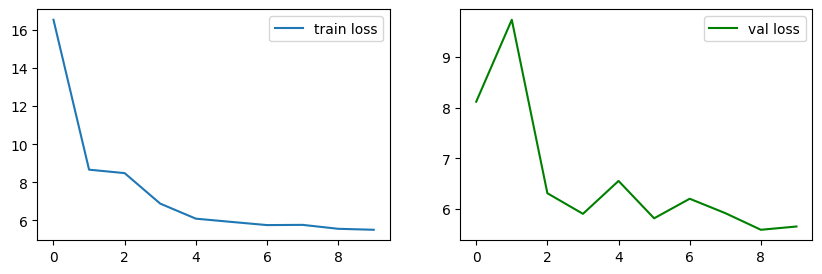

In [ ]:
plot_learning_curves(history_boston_0)

In [ ]:
model_boston_0.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 5.0862 - mse: 63.2704 - mae: 5.0862


[5.086231231689453, 63.27039337158203, 5.086231231689453]

In [ ]:
test_preds_0 = model_boston_0.predict(test_features)

4/4 [==============================] - 0s 3ms/step


In [ ]:
model_boston_0_results = evaluateResults(test_labels, tf.squeeze(test_preds_0))

In [ ]:
model_boston_0_results

{'mse': 61.472981770833336,
 'mae': 4.972033930759804,
 'rmse': 7.8404707620673735}

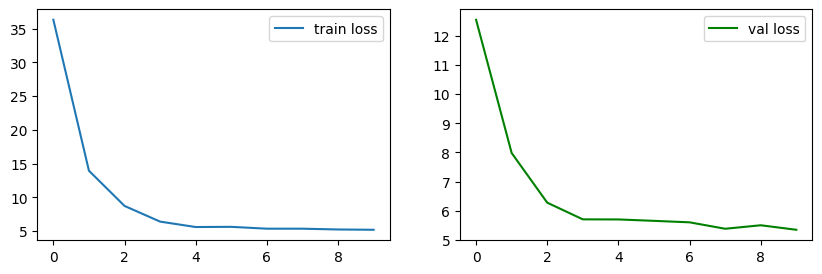


Evaluate Model on test_features
4/4 [==============================] - 0s 7ms/step - loss: 5.0862 - mse: 63.2704 - mae: 5.0862

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[23.121681]
 [24.621662]
 [18.346859]
 [25.154068]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 63.27038334865196, 'mae': 5.086231306487439, 'rmse': 7.954268247214948}

In [ ]:
model_boston_0_results = model_evaluation(model_boston_0, history_boston_0, test_features, test_labels)
model_boston_0_results

### Increasing number of units in layers + increasing by one layer

In [ ]:
model_boston_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_boston_1.summary()

model_boston_1.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_1 = model_boston_1.fit(train_features, train_labels,
                   epochs=10,
                   validation_split=0.1)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 128)               1792      
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [==============================] - 1s 21ms/step - loss: 8.6939 - mse: 142.8335 - mae: 8.6939 - val_loss: 6.9345 - val_mse: 77.9493 - val_mae: 6.9345
Epoch 2/10
12/1

In [ ]:
model_boston_1_results = model_evaluation(model_boston_1, test_features, test_labels)
model_boston_1_results

Evaluate Model on test_features
4/4 [==============================] - 0s 3ms/step - loss: 4.9237 - mse: 54.5771 - mae: 4.9237

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[22.364899]
 [24.947128]
 [18.504974]
 [24.882763]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 54.577124502144606, 'mae': 4.923695283777573, 'rmse': 7.38763321383409}

In [ ]:
model_boston_0_results

{'mse': 63.27038334865196, 'mae': 5.086231306487439, 'rmse': 7.954268247214948}

### Using best training rate

In [ ]:
model_boston_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_boston_3.summary()

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_boston_3.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_3 = model_boston_3.fit(train_features, train_labels,
                   epochs=100,
                   callbacks=[lr_scheduler])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 128)               1792      
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 dense_117 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 5.9434 - mse: 75.0105 - mae: 5.9434 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s

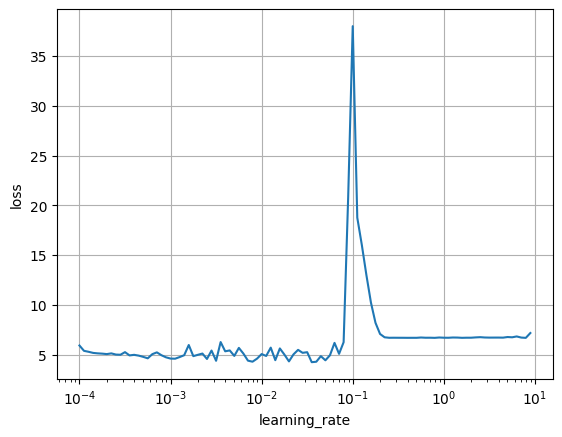

In [ ]:
lrs = history_boston_3.history['lr']
loss = history_boston_3.history['loss']
plt.semilogx(lrs, loss)
plt.xlabel('learning_rate')
plt.ylabel('loss')
#plt.axis([1e-4, 8e-2, 0, 20])
plt.grid(True)
plt.show()

#### 1e-3 looks good

####training with best learning rate

In [ ]:
model_boston_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_boston_4.compile(loss='mae',
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['mse', 'mae'])

history_boston_4 = model_boston_4.fit(train_features, train_labels,
                   epochs=100,
                   validation_split=0.1)

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 8.9698 - mse: 133.7244 - mae: 8.9698 - val_loss: 7.4191 - val_mse: 80.8093 - val_mae: 7.4191
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 5.8838 - mse: 70.3186 - mae: 5.8838 - val_loss: 5.8615 - val_mse: 68.6577 - val_mae: 5.8615
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 5.4630 - mse: 60.9168 - mae: 5.4630 - val_loss: 5.8165 - val_mse: 83.2794 - val_mae: 5.8165
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 5.5840 - mse: 62.8722 - mae: 5.5840 - val_loss: 6.5002 - val_mse: 95.4327 - val_mae: 6.5002
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 5.9514 - mse: 68.8099 - mae: 5.9514 - val_loss: 5.4835 - val_mse: 76.8856 - val_mae: 5.4835
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 5.1936 - mse: 58.7847 - mae: 5.1936 - val_loss: 5.3917 - val_mse: 74.1201 - val_mae: 5.3917
Epoch 7

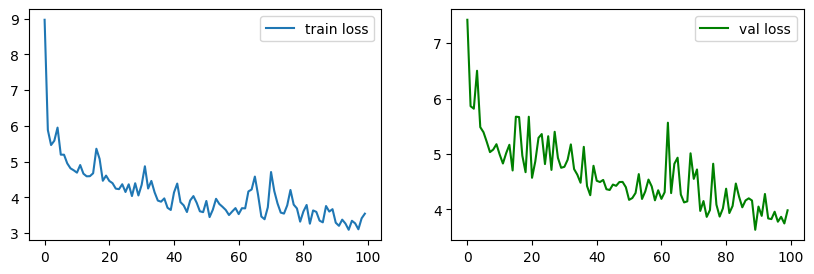


Evaluate Model on test_features
4/4 [==============================] - 0s 3ms/step - loss: 3.6704 - mse: 29.3436 - mae: 3.6704

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[21.022057]
 [28.214655]
 [22.992937]
 [29.605476]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 29.34364947150735,
 'mae': 3.6703643798828125,
 'rmse': 5.416977890993035}

In [ ]:
model_boston_4_results = model_evaluation(model_boston_4, history_boston_4, test_features, test_labels)
model_boston_4_results

### Increasing number of epochs to 200

In [ ]:
model_boston_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_boston_5.summary()

model_boston_5.compile(loss='mae',
                       optimizer='adam', # wil contiue with 0.001
                       metrics=['mse', 'mae'])

history_boston_5 = model_boston_5.fit(train_features, train_labels,
                   epochs=200,
                   validation_split=0.1)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 128)               1792      
                                                                 
 dense_127 (Dense)           (None, 64)                8256      
                                                                 
 dense_128 (Dense)           (None, 32)                2080      
                                                                 
 dense_129 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 13.8810 - mse: 310.3564 - mae: 13.8810 - val_loss: 11.5136 - val_mse: 212.7408 - val_mae: 11.5136
Epoch 2/2

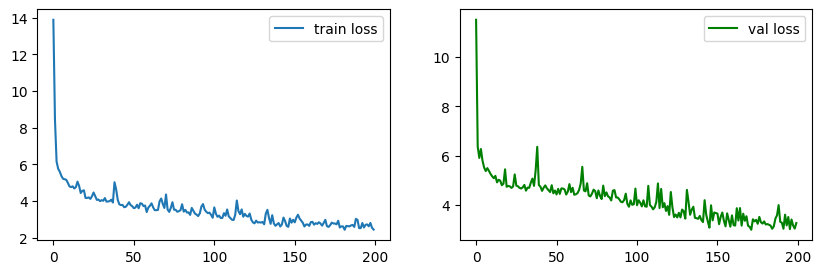


Evaluate Model on test_features
4/4 [==============================] - 0s 4ms/step - loss: 2.7321 - mse: 17.5856 - mae: 2.7321

Making prediction on test features...
4/4 [==============================] - 0s 4ms/step

First five examples of predictions:
[[20.101366]
 [25.808966]
 [19.276585]
 [29.137306]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 17.585613175934437,
 'mae': 2.7320523729511335,
 'rmse': 4.193520379816275}

In [ ]:
model_boston_5_results = model_evaluation(model_boston_5, history_boston_5, test_features, test_labels)
model_boston_5_results

In [ ]:
model_boston_4_results # 100 epochs

{'mse': 29.34364947150735,
 'mae': 3.6703643798828125,
 'rmse': 5.416977890993035}

### Using standardized data

In [ ]:
pd.DataFrame(train_features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
std_scaler =StandardScaler()
train_features_transformed = std_scaler.fit_transform(train_features)
test_features_transformed = std_scaler.transform(test_features)

In [ ]:
pd.DataFrame(train_features_transformed).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.405441,-0.477239,-1.035735,-0.272888,-0.382958,0.181467,0.535027,-0.535495,-0.534184,-0.666531,-0.873427,0.426420,-0.518584
1,-0.409315,1.172954,-0.694541,3.664502,-0.924830,0.654586,-1.293552,0.133337,-0.648794,-0.914355,-0.409315,0.441646,-1.273408


In [ ]:
pd.DataFrame(train_features_transformed).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.242431e-16,-5.716000e-17,1.112421e-15,-5.935846e-17,4.660738e-16,-3.587889e-15,-2.098431e-15,1.745578e-15,-1.121215e-16,6.155692e-17,2.045449e-14,4.629960e-15,7.606677e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.148100e-01,-4.772386e-01,-1.554755e+00,-2.728884e-01,-1.458101e+00,-3.768110e+00,-2.364985e+00,-1.240776e+00,-9.926234e-01,-1.309694e+00,-2.729877e+00,-3.871603e+00,-1.493964e+00
25%,-4.065174e-01,-4.772386e-01,-8.709208e-01,-2.728884e-01,-8.818242e-01,-5.617588e-01,-8.444429e-01,-7.921543e-01,-6.487939e-01,-7.550398e-01,-5.021374e-01,2.043837e-01,-7.853752e-01
50%,-3.867070e-01,-4.772386e-01,-2.203390e-01,-2.728884e-01,-1.421255e-01,-1.035111e-01,2.993117e-01,-2.919434e-01,-5.341840e-01,-4.659117e-01,2.868536e-01,3.807943e-01,-1.733655e-01
75%,-7.905947e-03,3.844663e-02,9.955262e-01,-2.728884e-01,5.975733e-01,4.643703e-01,9.037784e-01,6.195062e-01,1.643403e+00,1.516681e+00,7.973771e-01,4.297912e-01,5.948145e-01
max,9.339107e+00,3.648243e+00,2.389217e+00,3.664502e+00,2.722057e+00,3.451800e+00,1.102886e+00,3.894510e+00,1.643403e+00,1.782207e+00,1.632779e+00,4.416461e-01,3.444581e+00


In [ ]:
model_boston_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_boston_6.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_6 = model_boston_6.fit(train_features_transformed, train_labels,
                   epochs=200,
                   validation_split=0.1)

Epoch 1/200
12/12 [==============================] - 2s 48ms/step - loss: 22.2092 - mse: 580.4072 - mae: 22.2092 - val_loss: 22.3908 - val_mse: 592.9716 - val_mae: 22.3908
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 21.1323 - mse: 535.9108 - mae: 21.1323 - val_loss: 21.0566 - val_mse: 533.4979 - val_mae: 21.0566
Epoch 3/200
12/12 [==============================] - 0s 17ms/step - loss: 19.1227 - mse: 456.9236 - mae: 19.1227 - val_loss: 18.0565 - val_mse: 414.1842 - val_mae: 18.0565
Epoch 4/200
12/12 [==============================] - 0s 12ms/step - loss: 15.0264 - mse: 308.4631 - mae: 15.0264 - val_loss: 12.1097 - val_mse: 211.4546 - val_mae: 12.1097
Epoch 5/200
12/12 [==============================] - 0s 11ms/step - loss: 9.3761 - mse: 134.5107 - mae: 9.3761 - val_loss: 5.9396 - val_mse: 60.2199 - val_mae: 5.9396
Epoch 6/200
12/12 [==============================] - 0s 13ms/step - loss: 6.3675 - mse: 70.7048 - mae: 6.3675 - val_loss: 4.8805 - val_mse: 43.141

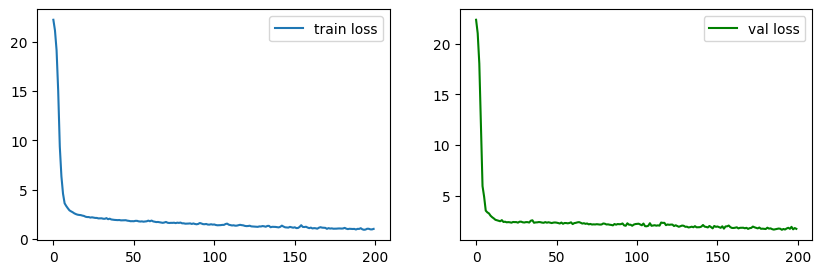


Evaluate Model on test_features
4/4 [==============================] - 0s 4ms/step - loss: 2.2620 - mse: 9.6480 - mae: 2.2620

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[23.539717]
 [29.916626]
 [18.454107]
 [24.816256]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 9.648012647441789,
 'mae': 2.2620305080039826,
 'rmse': 3.106125021218848}

In [ ]:
model_boston_6_results = model_evaluation(model_boston_6, history_boston_6, test_features_transformed, test_labels)
model_boston_6_results

In [ ]:
model_boston_5_results

{'mse': 17.585613175934437,
 'mae': 2.7320523729511335,
 'rmse': 4.193520379816275}

Observations:

- Standardizing data had drastic effect on the model performance
- the learning curves shows tsill declining loss, we can try for more epochs may be 500

### Increasing number of epochs to 500

In [ ]:
model_boston_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_boston_7.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_7 = model_boston_7.fit(train_features_transformed, train_labels,
                   epochs=500,
                   validation_split=0.1)

Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 21.8703 - mse: 567.2469 - mae: 21.8703 - val_loss: 21.6556 - val_mse: 560.0915 - val_mae: 21.6556
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 19.7769 - mse: 482.4091 - mae: 19.7769 - val_loss: 18.7609 - val_mse: 439.8584 - val_mae: 18.7609
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 15.7684 - mse: 337.5593 - mae: 15.7684 - val_loss: 12.7508 - val_mse: 238.1535 - val_mae: 12.7508
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 10.0127 - mse: 152.5404 - mae: 10.0127 - val_loss: 6.7435 - val_mse: 80.7159 - val_mae: 6.7435
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 6.8346 - mse: 82.6018 - mae: 6.8346 - val_loss: 5.5136 - val_mse: 55.0193 - val_mae: 5.5136
Epoch 6/500
12/12 [==============================] - 0s 7ms/step - loss: 5.0768 - mse: 49.4362 - mae: 5.0768 - val_loss: 3.9952 - val_mse: 32.4261 - val_

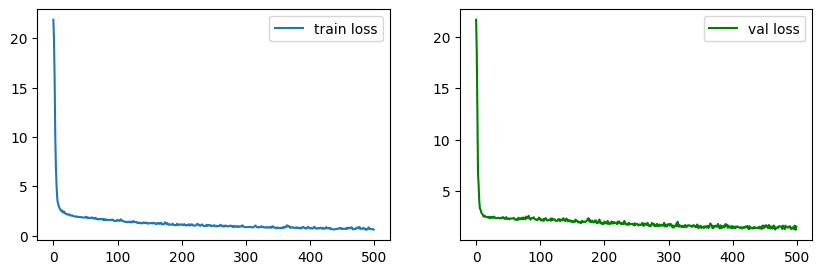


Evaluate Model on test_features
4/4 [==============================] - 0s 3ms/step - loss: 2.1826 - mse: 8.8947 - mae: 2.1826

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[23.502766]
 [28.119041]
 [19.326635]
 [23.592373]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 8.89472931506587, 'mae': 2.182608810125613, 'rmse': 2.9824032784091874}

In [ ]:
model_boston_7_results = model_evaluation(model_boston_7, history_boston_7, test_features_transformed, test_labels)
model_boston_7_results

In [ ]:
model_boston_6_results

{'mse': 9.648012647441789,
 'mae': 2.2620305080039826,
 'rmse': 3.106125021218848}

### let's try for 1000 epochs

In [ ]:
model_boston_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_boston_8.compile(loss='mae',
                       optimizer='adam',
                       metrics=['mse', 'mae'])

history_boston_8 = model_boston_8.fit(train_features_transformed, train_labels,
                   epochs=1000,
                   validation_split=0.1)

Epoch 1/1000
12/12 [==============================] - 1s 21ms/step - loss: 22.0174 - mse: 573.0139 - mae: 22.0174 - val_loss: 21.9432 - val_mse: 572.0789 - val_mae: 21.9432
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 20.2202 - mse: 498.3711 - mae: 20.2202 - val_loss: 19.5429 - val_mse: 470.3080 - val_mae: 19.5429
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 17.0046 - mse: 375.1599 - mae: 17.0046 - val_loss: 14.9217 - val_mse: 299.4891 - val_mae: 14.9217
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 11.8798 - mse: 203.3484 - mae: 11.8798 - val_loss: 8.2379 - val_mse: 111.0148 - val_mae: 8.2379
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 7.4738 - mse: 88.4995 - mae: 7.4738 - val_loss: 5.8528 - val_mse: 58.1429 - val_mae: 5.8528
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 5.6249 - mse: 58.5793 - mae: 5.6249 - val_loss: 4.2365 - val_mse: 34.6335

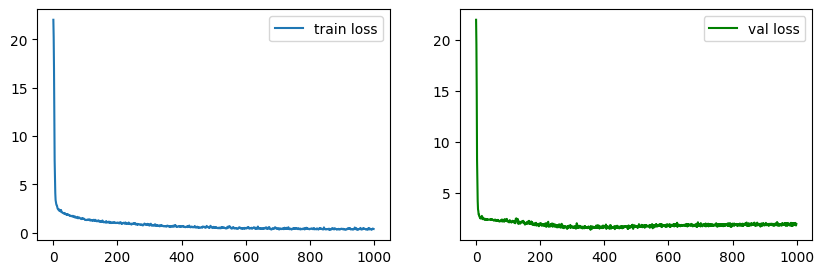


Evaluate Model on test_features
4/4 [==============================] - 0s 4ms/step - loss: 2.1229 - mse: 8.8483 - mae: 2.1229

Making prediction on test features...
4/4 [==============================] - 0s 3ms/step

First five examples of predictions:
[[22.348701]
 [27.261093]
 [17.226204]
 [24.11849 ]]

First five true test labels:
[22.4 28.6 19.5 24.8 24.5]



{'mse': 8.848322849647671,
 'mae': 2.1228669110466454,
 'rmse': 2.9746130588107875}

In [ ]:
model_boston_8_results = model_evaluation(model_boston_8, history_boston_8, test_features_transformed, test_labels)
model_boston_8_results

In [ ]:
model_boston_7_results

{'mse': 8.89472931506587, 'mae': 2.182608810125613, 'rmse': 2.9824032784091874}

## Save the best model

In [ ]:
model_boston_8.save('model_boston_8')

In [ ]:
model_boston_8_loaded = tf.keras.models.load_model('model_boston_8')

In [ ]:
model_boston_8_loaded.evaluate(test_features_transformed, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 2.1229 - mse: 8.8483 - mae: 2.1229


[2.1228671073913574, 8.848322868347168, 2.1228671073913574]

Successfully saved best model and tested the same

In [ ]:
print("I just wanna Thank You Lord!!") #https://www.youtube.com/watch?v=sax4aTgZ9dw

I just wanna Thank You Lord!!
